# Import Essential Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler     ## Standardization Technique


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import Warning Library
import warnings
warnings.filterwarnings("ignore")

# Read the Dataset

In [4]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
# Shape of the dataset
df.shape

(10000, 14)

In [8]:
# Check Dtype and Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Cleaning

In [9]:
# Check Missing Values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [10]:
# Check Duplicated Values
df.duplicated().sum()

np.int64(0)

#EDA (Exploratory Data Analysis)

In [11]:
# Drop irrelevant columns for analysis
df_clean = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [12]:
# Convert categorical columns to numeric for correlation
df_clean = pd.get_dummies(df_clean,columns = ['Geography','Gender'], drop_first=True)

In [13]:
df_clean

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


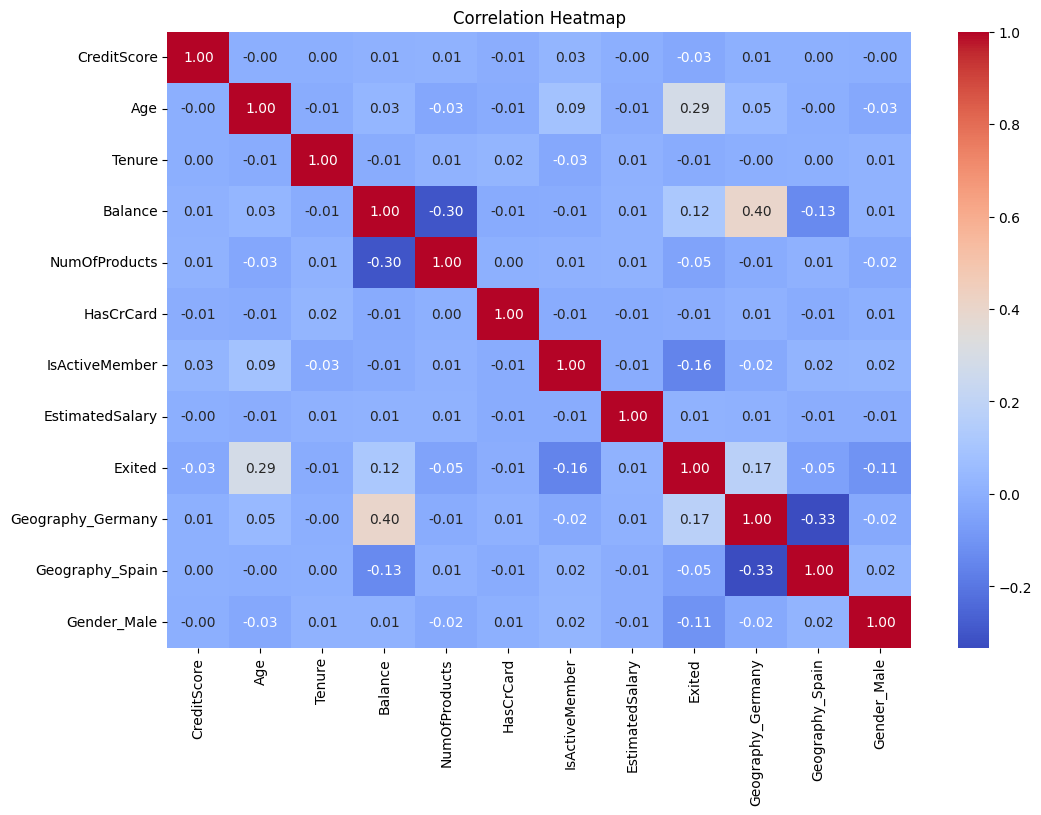

In [14]:
# Correlation heatmap
plt.figure(figsize=(12,8))

sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")

plt.show()

# Check Distribution of the dataset

In [16]:
numeric_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns

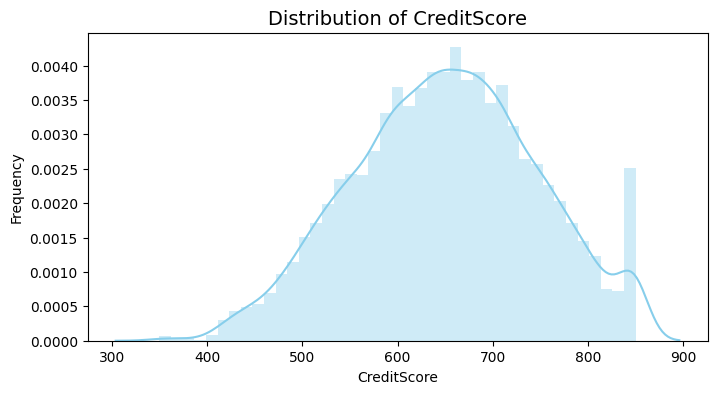

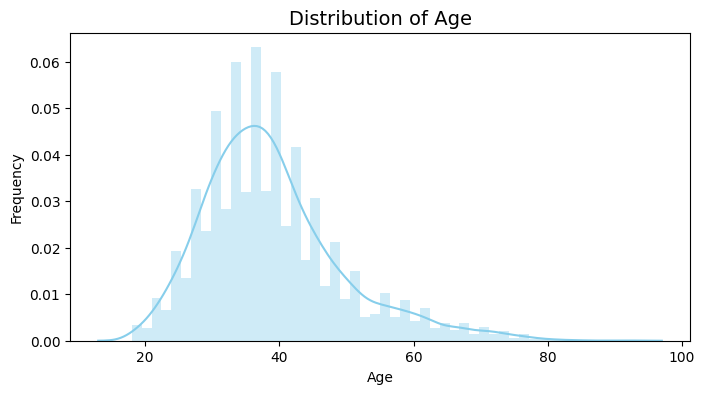

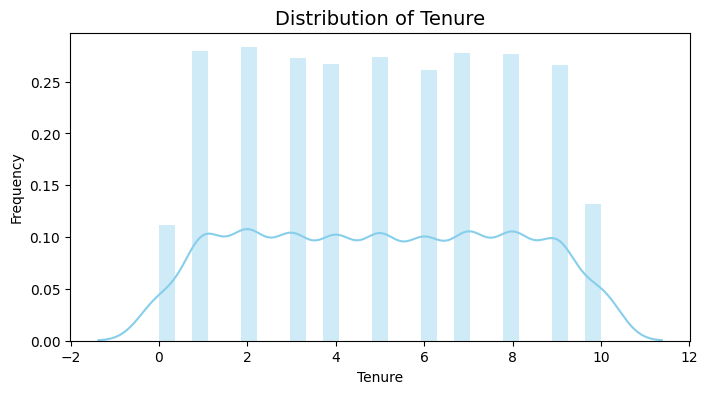

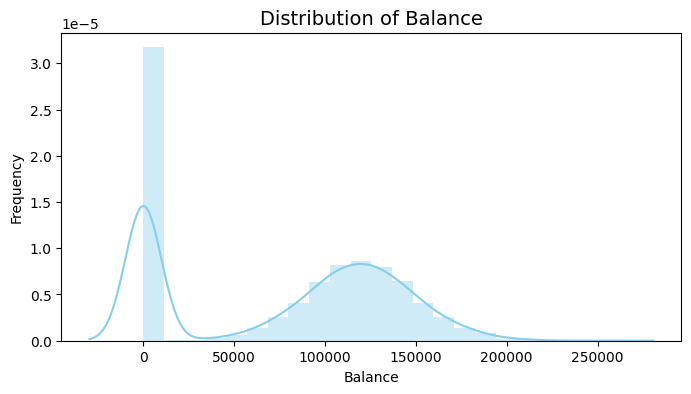

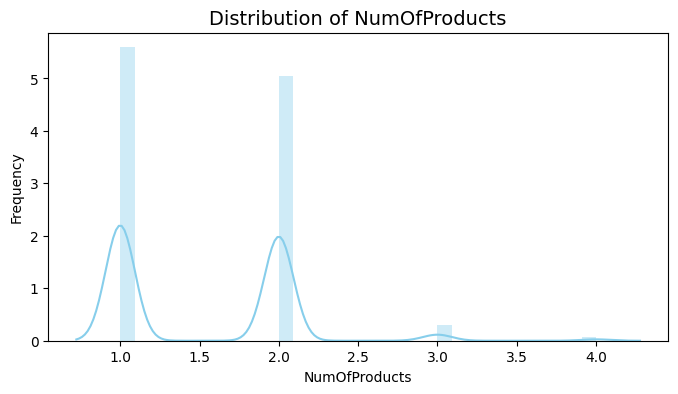

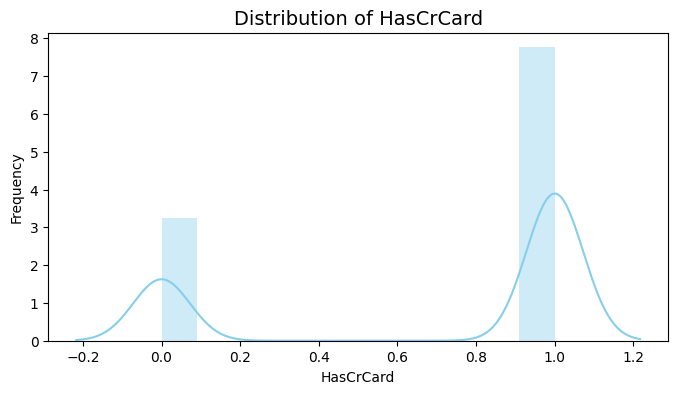

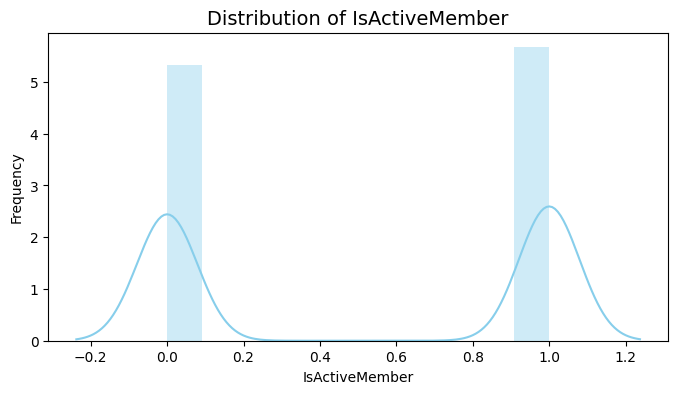

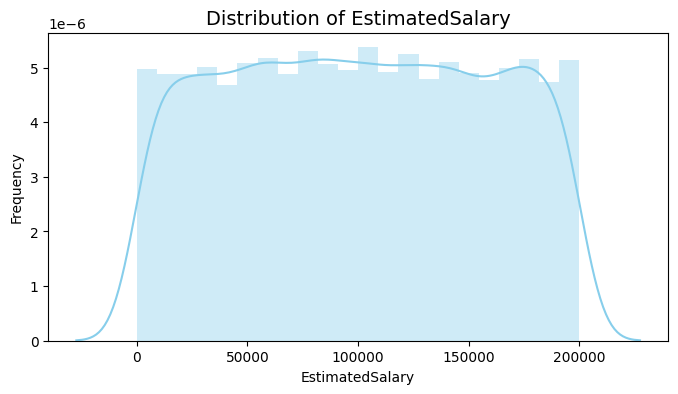

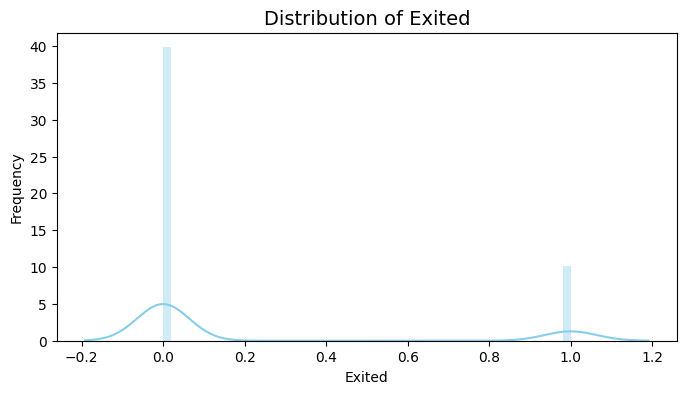

In [17]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.distplot(df_clean[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Data Preprocessing

In [20]:
# Separate Independent and Dependent Variable
X = df_clean.drop('Exited', axis=1)
y = df_clean['Exited']

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame (for easy reading)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN Model

In [22]:
model = Sequential([
    Dense(3, activation = 'sigmoid',input_dim = 11),
    Dense(1, activation = 'sigmoid'),
    ])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:

# Import Adam Optimizer for gradient algorithms
from tensorflow.keras.optimizers import Adam

In [25]:
# Compile the model
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam')

# Train the model
model.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5678
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5527
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5378
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5314
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5225
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5168
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4989
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5283
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5060
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5034
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5073
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4935
Epoch 13/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5067
Epoch 14/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4989
Epoch 15/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [26]:
# for Layer 1 weights and bias
model.layers[0].get_weights()


[array([[ 0.18589133,  0.42452785,  0.19088683],
        [ 0.11786211,  0.5115923 , -0.57468855],
        [-0.2527386 , -0.04825659, -0.540312  ],
        [ 0.5430756 , -0.02244312,  0.29511   ],
        [-0.138426  , -0.13493285,  0.06895059],
        [-0.6037131 ,  0.34967026,  0.3165794 ],
        [-0.6249549 ,  0.44600993,  0.54630643],
        [-0.54446226,  0.23222944,  0.00570333],
        [-0.05339452,  0.33788282, -0.38699216],
        [ 0.39847618, -0.07736248,  0.5287969 ],
        [ 0.5673418 ,  0.06462222,  0.00877053]], dtype=float32),
 array([-0.02112262,  0.01610945,  0.06914586], dtype=float32)]

In [27]:
# for layers 2 weights and bias
model.layers[1].get_weights()

[array([[ 0.25263214],
        [-0.72370696],
        [-0.3361626 ]], dtype=float32),
 array([-0.39175978], dtype=float32)]

In [28]:
y_log = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
y_pred = np.where(y_log>0.5,1,0)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8035

# How can we Improve our accuracy score

In [32]:
# 1. Hidden Layer main Activation Function main 'Relu' rakho.
# 2. You can increase No of epochs e.g. 100 , 1000
# 3. You can increase no of nodes
# 4. You can increase no of hidden layer

In [33]:
model = Sequential([
    Dense(11, activation = 'relu',input_dim = 11),
    Dense(11, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
    ])

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#Compile the model
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [36]:
# Train the model
history = model.fit(X_train, y_train, epochs=200,validation_split = 0.2)

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3232 - loss: 12923.5098 - val_accuracy: 0.7256 - val_loss: 159.1804
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7084 - loss: 83.7839 - val_accuracy: 0.7500 - val_loss: 11.6938
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7007 - loss: 17.4065 - val_accuracy: 0.7613 - val_loss: 11.3719
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6994 - loss: 17.6987 - val_accuracy: 0.7750 - val_loss: 10.6613
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6944 - loss: 15.3160 - val_accuracy: 0.7987 - val_loss: 30.4533
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6952 - loss: 21.9304 - val_accuracy: 0.7950 - val_loss: 14.9514
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7222 - loss: 19.6963 - val_accuracy: 0.4737 - val_loss: 32.5865
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6903 - loss:

In [37]:
y_log = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [38]:
y_pred = np.where(y_log>0.5,1,0)

In [39]:
accuracy_score(y_test,y_pred)

0.8035